In [31]:
import os

input_files = []
for dirname, _, filenames in os.walk('eyes_dataset'):
    for filename in filenames:
        input_files.append(os.path.join(dirname, filename))

print(input_files)


['eyes_dataset\\train\\Closed_Eyes\\s0001_00001_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00002_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00003_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00004_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00005_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00006_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00007_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00008_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00009_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00011_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00013_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00014_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00015_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00016_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00017_0_0_0_0_0_01.png', 'eyes_dat

In [32]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [48]:
import numpy as np
from tqdm import tqdm
from glob import glob
from PIL import Image

data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\eyes_dataset'  # Data directory path
train_dir = os.path.join(data_dir, 'train')                            # Train directory path
test_dir = os.path.join(data_dir, 'test')                              # Test directory path

X = []
Y = []

# Loop for Open_Eyes images
for i in tqdm(glob(os.path.join(train_dir, 'Open_Eyes', '*'))):
    temp = np.array(Image.open(i).resize((32,32)))
    X.append(temp)
    Y.append(1)
    
# Loop for Closed_Eyes images
for i in tqdm(glob(os.path.join(train_dir, 'Closed_Eyes', '*'))):
    temp = np.array(Image.open(i).resize((32,32)))
    X.append(temp)
    Y.append(0)


100%|██████████| 2000/2000 [00:01<00:00, 1888.47it/s]


In [34]:
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

In [35]:
X.shape

(4000, 32, 32)

In [36]:
X = np.expand_dims(X,-1)

In [37]:
X.shape

(4000, 32, 32, 1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten

model = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(32, 32, 1)),
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),

    Flatten(),
    Dense(units=256, activation='relu', use_bias=False),
    BatchNormalization(),

    Dense(units=128, use_bias=False, activation='relu'),

    Dense(units=84, use_bias=False, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(32, 32, 1)),  # Modify input_shape
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    Flatten(),
    Dense(units=256, activation='relu', use_bias=False),
    BatchNormalization(),
    Dense(units=128, use_bias=False, activation='relu'),
    Dense(units=84, use_bias=False, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 64)       │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,285 (1.49 MB)

 Trainable params: 388,413 (1.48 MB)

 Non-trainable params: 872 (3.41 KB)

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [61]:
import h5py
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_accuracy',  # Change monitoring metric to validation accuracy
    mode='max',  # Change mode to maximize validation accuracy
    save_best_only=True,
    verbose=1
)

model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=32, callbacks=[callback])  # Pass the callback as a list


Epoch 1/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9986 - loss: 0.0033
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to bestModel.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9986 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 4.6099e-05
Epoch 2/30
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 2: val_accuracy did not improve from 1.00000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 4.3204e-04
Epoch 3/30
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 3.4967e-04
Epoch 3: val_accuracy did not improve from 1.00000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 3.4911e-04 - val_accuracy: 1.0000 - val_loss: 4.8254e-05
Epoch 4/30
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.8058e-04
Epoch 4: val_accuracy did not improve from 1.00000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy

In [62]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9886 - loss: 0.0309


[0.032871391624212265, 0.9869999885559082]

In [63]:
from keras.models import load_model
best_model = load_model('best_model.keras')
best_model.evaluate(x_test, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.3158e-04


[0.0015736316563561559, 1.0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


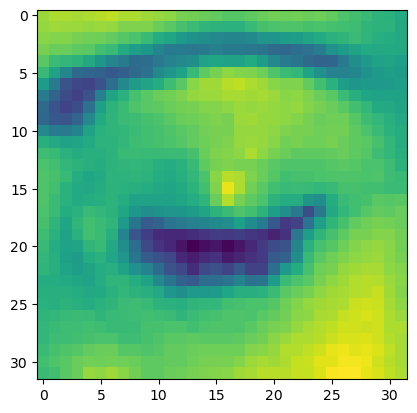

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


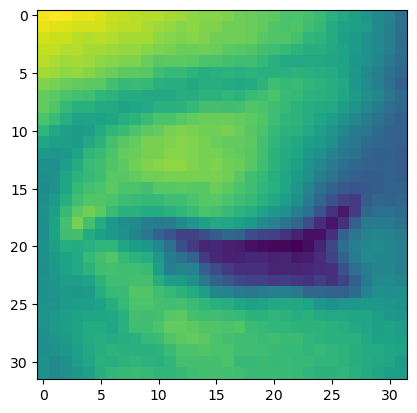

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


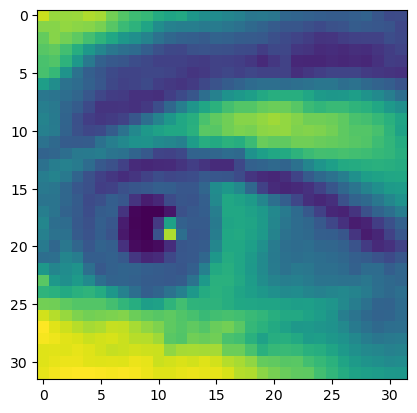

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


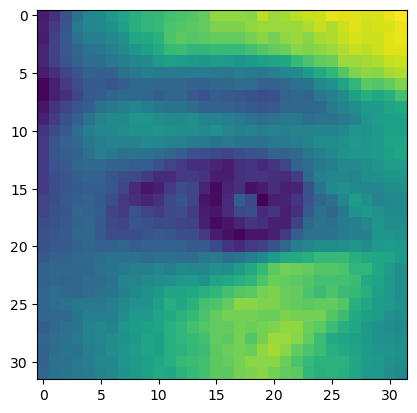

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


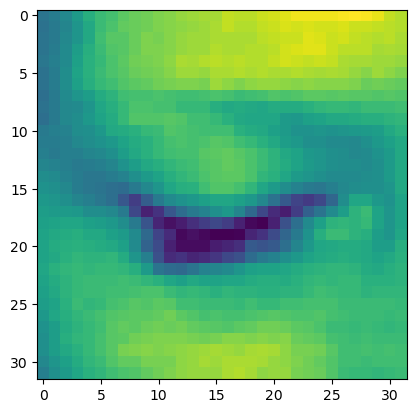

Closed


In [58]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0.5, 25.722222222222214, 'Actual')

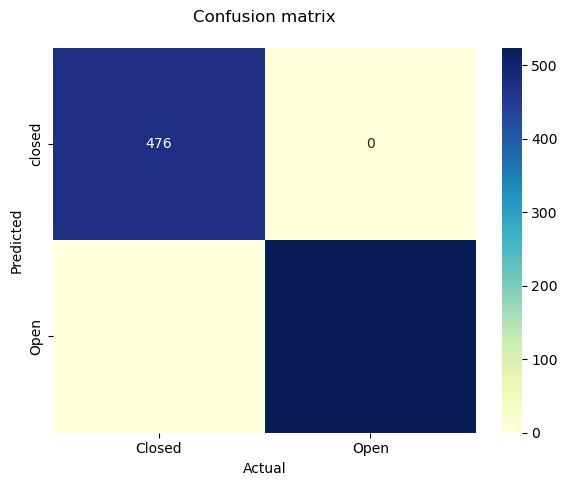

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")
